In [3]:
# !pip install praw

In [4]:
# !pip install --upgrade pip

In [30]:
import praw
import json
from PIL import Image
import urllib.request
import numpy as np

In [4]:
url = 'https://www.reddit.com/'
with open('/Users/patrickfuller/.secrets/reddit_api.json') as f:
    params = json.load(f)

In [5]:
reddit = praw.Reddit(client_id=params['client_id'], 
                     client_secret=params['api_key'],
                     password=params['password'], 
                     user_agent='explore_json accessAPI:v0.0.1 (by /u/patfullah)',
                     username=params['username'])

In [6]:
subreddit_news = reddit.subreddit('news')

In [7]:
subreddit_itap = reddit.subreddit('itookapicture')

In [8]:
subreddit_news.display_name, subreddit_itap.display_name

('news', 'itookapicture')

In [9]:
submission = subreddit_itap.top().next()

In [10]:
vars(submission)

{'_reddit': <praw.reddit.Reddit at 0x10e4e6eb8>,
 'approved_at_utc': None,
 'subreddit': Subreddit(display_name='itookapicture'),
 'selftext': '',
 'author_fullname': 't2_bzmgj',
 'saved': False,
 'mod_reason_title': None,
 'gilded': 3,
 'clicked': False,
 'title': 'ITAP of my friend',
 'link_flair_richtext': [],
 'subreddit_name_prefixed': 'r/itookapicture',
 'hidden': False,
 'pwls': 6,
 'link_flair_css_class': None,
 'downs': 0,
 'thumbnail_height': 140,
 'hide_score': False,
 'name': 't3_7t4f5h',
 'quarantine': False,
 'link_flair_text_color': 'dark',
 'author_flair_background_color': '',
 'subreddit_type': 'public',
 'ups': 46156,
 'total_awards_received': 3,
 'media_embed': {},
 'thumbnail_width': 140,
 'author_flair_template_id': None,
 'is_original_content': False,
 'user_reports': [],
 'secure_media': None,
 'is_reddit_media_domain': False,
 'is_meta': False,
 'category': None,
 'secure_media_embed': {},
 'link_flair_text': None,
 'can_mod_post': False,
 'score': 46156,
 'appr

In [11]:
for submission in subreddit_itap.top(limit=5):
    print(submission.title)

ITAP of my friend
ITAP , only one
ITAP of a VW Bus reflection
ITAP of my brother fishing in the fog during the golden hour.
ITAP after a tornado in Gum Creek Tennessee


In [40]:
for submission in subreddit_itap.top(limit=3):
    print(submission.preview['images'][0]['source']['url'])

https://external-preview.redd.it/zfjtVV6WHqN4RRIWMwKGPuDuK2BbmQ_t5zEKQ0dorVg.jpg?auto=webp&s=b04bcc06a4c28fdbed8529dd775668eacc7fd9f6
https://external-preview.redd.it/qd8eiaEhi75MoCrolfp-gXa0nLeoErnbFL7uxsAKjwo.jpg?auto=webp&s=8e66b164a1f905076cbb74e810b376e0191fb85b
https://preview.redd.it/3yxl6dr580g21.jpg?auto=webp&s=84e2604eae59286cbbd08650cfb29e389326f063


In [41]:
# for submission in subreddit_itap.top(limit=200):
#     print(submission.preview['images'][0]['source']['url'])    # To confirm this index location is present for all submissions

In [42]:
# submission = subreddit_news.top(limit=1).next()
# display(vars(submission))     # To check if there is an image associated with news submissions

In [43]:
test_url = submission.preview['images'][0]['source']['url']

In [50]:
I = Image.open(urllib.request.urlopen(test_url)).resize((150,150))

In [58]:
small = np.asarray(I)
small.shape

(150, 150, 3)

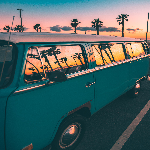

In [61]:
Image.fromarray(small)